<a href="https://colab.research.google.com/github/saktiworkstation/road-to-ai-developer/blob/main/22_11_4677_Sakti_Davies_Bouldin_Index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import product
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [20]:
#make_circles dapat digunakan untuk menghasilkan data dalam bentuk circle
X, y = datasets.make_circles(n_samples=500, noise=0.02, random_state=0)

In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import product
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
#make_circles dapat digunakan untuk menghasilkan data dalam bentuk circle
X, y = datasets.make_circles(n_samples=500, noise=0.02, random_state=0)
# Convert to DataFrame for easier handling
df = pd.DataFrame(X, columns=['x', 'y'])
df['labels'] = y # Add true labels

# Display the dataset
df

,x,y,labels
0,-0.649350,0.769462,0
1,0.757235,0.084065,1
2,0.550744,0.591779,1
3,0.143687,-0.783882,1
4,0.453481,-0.719929,1
...,...,...,...
495,-0.187773,0.784286,1
496,0.106043,-1.018875,0
497,-1.035402,0.222745,0
498,0.367995,0.916108,0


In [22]:
#menampilkan 5 data teratas
#X adalah data yang membentuk circle
print('Nilai X : \n',X[:5])
#sedangkan y, adalah cluster dari data tersebut
print('\nCluster :\n',y[:5])

Nilai X : 
 [[-0.64935027  0.7694619 ]
 [ 0.75723522  0.08406494]
 [ 0.55074407  0.59177894]
 [ 0.14368733 -0.7838818 ]
 [ 0.45348142 -0.71992857]]

Cluster :
 [0 1 1 1 1]


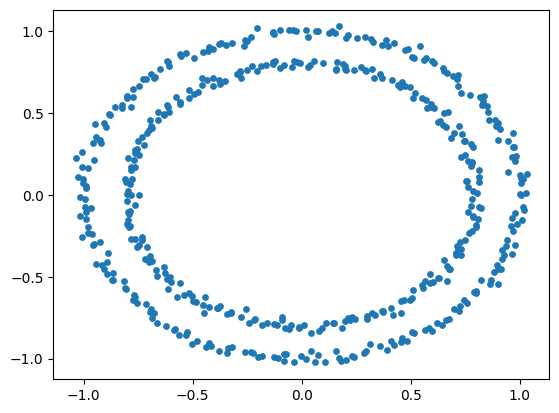

In [23]:
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.show()

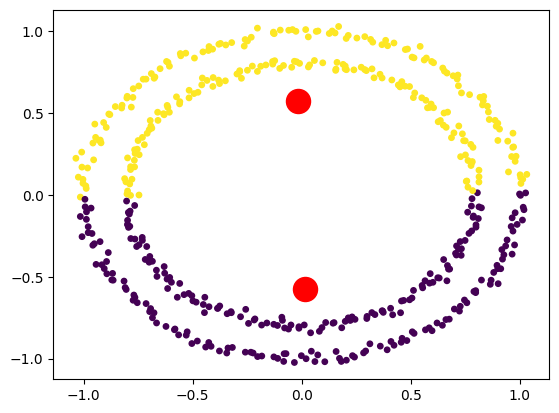

In [24]:
kmeans_cluster = KMeans(n_clusters=2, init='k-means++', max_iter=300,
n_init=10, random_state=0)
kmeans_result = kmeans_cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:, 0],
            kmeans_cluster.cluster_centers_[:, 1],
            s=300, c='red')
plt.show()

In [25]:
"""
CATATAN :

range untuk eps_values diperoleh dari beberapa percobaan-
setelah menerapkan NearestNeighbor.

sedangkan min_samples juga diperoleh dari beberapa percobaan
"""
#create eps and min_samples combination
eps_values = np.arange(0.01,1.1,0.01)
min_samples = np.arange(1,10)
dbscan_params = list(product(eps_values, min_samples))
#list contains looping result
no_of_clusters = []
epsvalues = []
min_samp = []

#itarate over parameter combinations
for p in dbscan_params:
  #create a dbscan cluster based on a combination of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
  #no of cluster must be > 1, so if cluster <= 1 then pass to next iteration
  if len(np.unique(dbscan_cluster.labels_)) <= 1 :
    pass
  else :
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))
  #append values to list
  epsvalues.append(p[0])
  min_samp.append(p[1])

#create a dataframe based on the iteration results
eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min,
                          columns=['no_of_clusters',
                                    'epsilon_values', 'minimum_points'])
eps_min_df

,no_of_clusters,epsilon_values,minimum_points
0,467,0.01,1
1,32,0.01,2
2,3,0.01,3
3,377,0.01,4
4,99,0.01,5
...,...,...,...
73,2,0.09,2
74,2,0.09,3
75,2,0.09,4
76,2,0.09,5


In [26]:
"""
CATATAN:
karena tujuannya menghasilkan cluster == 2,
maka dapat menggunakan salah satu dari -
beberapa kombinasi parameter eps dan min_pts
"""
eps_min_df[eps_min_df['no_of_clusters']==2]

,no_of_clusters,epsilon_values,minimum_points
6,2,0.01,7
17,2,0.02,9
42,2,0.05,7
43,2,0.05,8
44,2,0.05,9
45,2,0.06,1
51,2,0.06,7
52,2,0.06,8
53,2,0.06,9
54,2,0.07,1


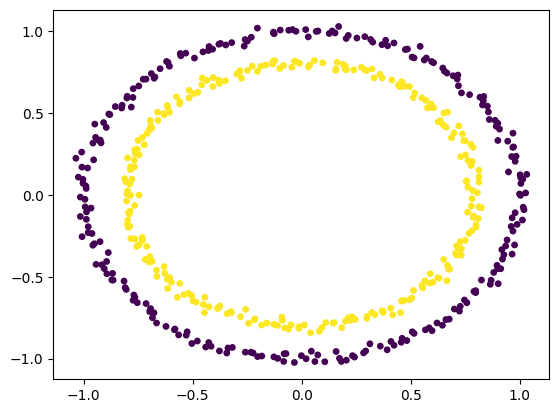

In [27]:
dbscan_cluster = DBSCAN(eps=0.09,min_samples=5)
dbscan_cluster.fit(X)
dbscan_result = dbscan_cluster.labels_
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)
plt.show()

In [28]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)
print('DBI KMeans Score : ',dbi_kmeans)
print('DBI DBSCAN Score : ',dbi_dbscan)

DBI KMeans Score :  1.1405252293349897
DBI DBSCAN Score :  690.8008186438688


In [29]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)
print('Silhouette Score KMeans Score : ',sil_kmeans)
print('Silhouette Score DBSCAN Score : ',sil_dbscan)

Silhouette Score KMeans Score :  0.4012044555844719
Silhouette Score DBSCAN Score :  0.018394551918884203


In [30]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from itertools import product
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [31]:
#make_circles dapat digunakan untuk menghasilkan data dalam bentuk circle
X, y = datasets.make_blobs(n_samples=500, centers=4,
                           cluster_std=0.7, random_state=0)

In [32]:
#menampilkan 5 data teratas
#X adalah data yang membentuk circle
print('Nilai X : \n',X[:5])
#sedangkan y, adalah cluster dari data tersebut
print('\nCluster :\n',y[:5])

Nilai X : 
 [[2.46023257 1.14242178]
 [3.66800921 0.15565258]
 [1.00830104 4.17275863]
 [0.16694238 4.850626  ]
 [1.14069873 2.05835514]]

Cluster :
 [1 1 0 0 1]


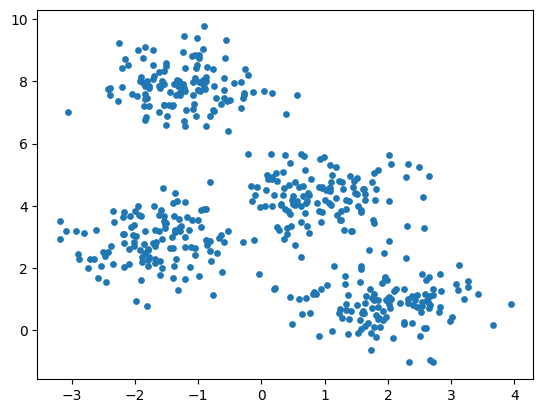

In [33]:
plt.scatter(X[:, 0], X[:, 1], s=15)
plt.show()

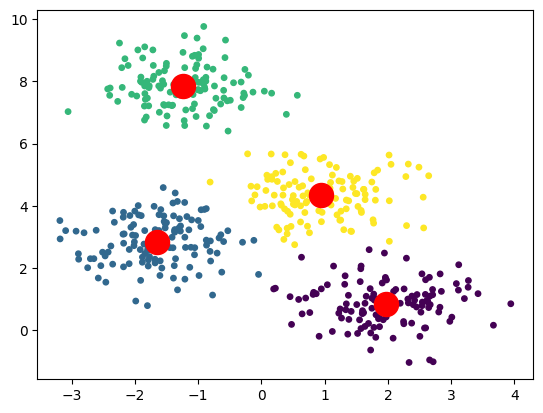

In [34]:
kmeans_cluster = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_result = kmeans_cluster.fit_predict(X)
plt.scatter(X[:,0], X[:,1], s=15, c=kmeans_result)
plt.scatter(kmeans_cluster.cluster_centers_[:, 0], kmeans_cluster.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.show()

In [35]:
#create eps and min_samples combination
eps_values = np.arange(0.01,1.1,0.01)
min_samples = np.arange(5,10)
dbscan_params = list(product(eps_values, min_samples))

In [36]:
#list contains looping result
no_of_clusters = []
epsvalues = []
min_samp = []
#itarate over parameter combinations
for p in dbscan_params:
  #create a dbscan cluster based on a combination of parameters
  dbscan_cluster = DBSCAN(eps=p[0], min_samples=p[1]).fit(X)
  #no of cluster must be > 1, so if cluster <= 1 then pass
  if len(np.unique(dbscan_cluster.labels_)) <= 1 :
    pass
  else :
    no_of_clusters.append(len(np.unique(dbscan_cluster.labels_)))
  #append values to list
  epsvalues.append(p[0])
  min_samp.append(p[1])


#create a dataframe based on the iteration results
eps_min = list(zip(no_of_clusters, epsvalues, min_samp))
eps_min_df = pd.DataFrame(eps_min, columns=['no_of_clusters', 'epsilon_values', 'minimum_points'])
eps_min_df

,no_of_clusters,epsilon_values,minimum_points
0,2,0.01,5
1,3,0.01,6
2,6,0.01,7
3,9,0.01,8
4,14,0.01,9
...,...,...,...
351,2,0.71,6
352,2,0.71,7
353,2,0.71,8
354,2,0.71,9


In [37]:
"""
karena tujuannya menghasilkan cluster == 4,
maka dapat menggunakan salah satu dari -
beberapa kombinasi parameter eps dan min_pts
"""
eps_min_df[eps_min_df['no_of_clusters']==4]

,no_of_clusters,epsilon_values,minimum_points
7,4,0.02,7
12,4,0.03,7
191,4,0.39,6
192,4,0.39,7
196,4,0.40,6
...,...,...,...
280,4,0.57,5
285,4,0.58,5
290,4,0.59,5
295,4,0.60,5


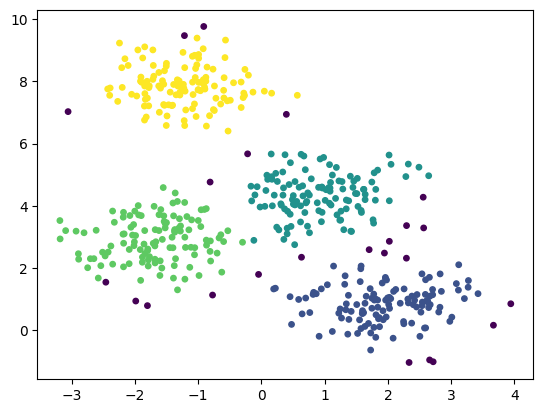

In [38]:
dbscan_cluster = DBSCAN(eps=0.5,min_samples=6)
dbscan_cluster.fit(X)
dbscan_result = dbscan_cluster.labels_
plt.scatter(X[:,0], X[:,1], s=15, c=dbscan_result)
plt.show()

In [39]:
dbi_kmeans = davies_bouldin_score(X, kmeans_result)
dbi_dbscan = davies_bouldin_score(X, dbscan_result)
print('DBI KMeans Score : ',dbi_kmeans)
print('DBI DBSCAN Score : ',dbi_dbscan)

DBI KMeans Score :  0.5120623635610269
DBI DBSCAN Score :  1.949002068918896


In [40]:
sil_kmeans = silhouette_score(X, kmeans_result)
sil_dbscan = silhouette_score(X, dbscan_result)
print('Silhouette Score KMeans Score : ',sil_kmeans)
print('Silhouette Score DBSCAN Score : ',sil_dbscan)

Silhouette Score KMeans Score :  0.6322199807775134
Silhouette Score DBSCAN Score :  0.5953553670533912


# Tugas

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [88]:
data, labels = make_moons(n_samples=600, noise=0.05, random_state=42)
data_df = pd.DataFrame(data, columns=['Feature1', 'Feature2'])
data_df['TrueLabel'] = labels

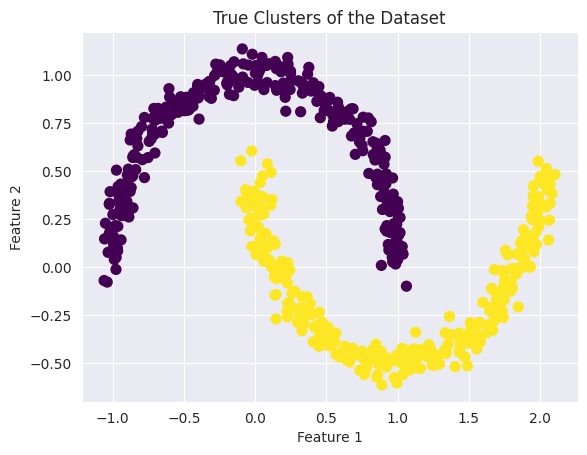

In [89]:
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=50)
plt.title('True Clusters of the Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [90]:
kmeans = KMeans(n_clusters=2, random_state=42)
data_df['KMeansLabel'] = kmeans.fit_predict(data)

In [91]:
dbscan = DBSCAN(eps=0.2, min_samples=5)
data_df['DBSCANLabel'] = dbscan.fit_predict(data)

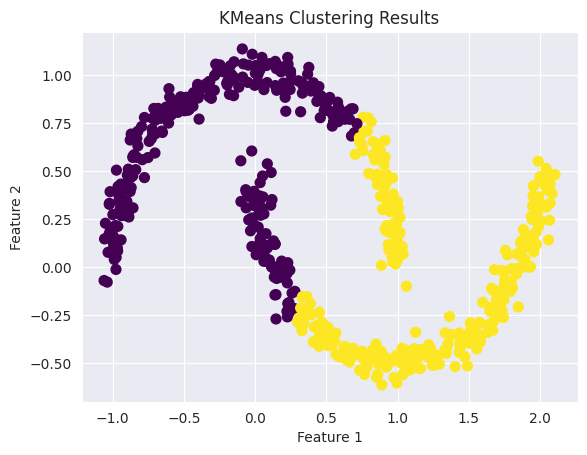

In [92]:
plt.scatter(data[:, 0], data[:, 1], c=data_df['KMeansLabel'], cmap='viridis', s=50)
plt.title('KMeans Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

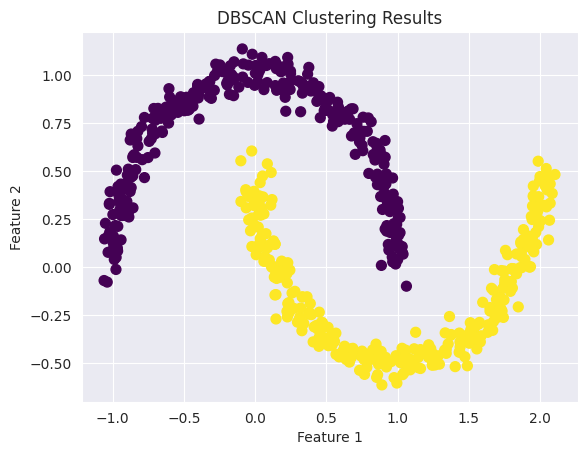

In [93]:
plt.scatter(data[:, 0], data[:, 1], c=data_df['DBSCANLabel'], cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [94]:
def evaluate_clustering(true_labels, predicted_labels, data):
    silhouette = silhouette_score(data, predicted_labels) if len(set(predicted_labels)) > 1 else -1
    davies_bouldin = davies_bouldin_score(data, predicted_labels) if len(set(predicted_labels)) > 1 else np.inf
    return silhouette, davies_bouldin

kmeans_silhouette, kmeans_davies_bouldin = evaluate_clustering(labels, data_df['KMeansLabel'], data)
dbscan_silhouette, dbscan_davies_bouldin = evaluate_clustering(labels, data_df['DBSCANLabel'], data)

In [95]:
print("Clustering Evaluation:")
print(f"KMeans - Silhouette Score: {kmeans_silhouette:.3f}, Davies-Bouldin Score: {kmeans_davies_bouldin:.3f}")
print(f"DBSCAN - Silhouette Score: {dbscan_silhouette:.3f}, Davies-Bouldin Score: {dbscan_davies_bouldin:.3f}")

Clustering Evaluation:
KMeans - Silhouette Score: 0.491, Davies-Bouldin Score: 0.779
DBSCAN - Silhouette Score: 0.332, Davies-Bouldin Score: 1.160


# Penjelasan Singkat
---------------------
KMeans membagi data ke dalam 2 cluster dengan baik, ditunjukkan dari silhouette score
yang relatif tinggi (semakin mendekati 1 semakin bagus).
DBSCAN secara otomatis mengelompokkan data dengan parameter eps dan min_samples.
Data yang tidak memenuhi kriteria akan diklasifikasikan sebagai noise (label = -1).
Hasil jumlah cluster DBSCAN dapat berbeda tergantung parameter.
Silhouette score bisa menjadi acuan, namun pemilihan parameter pada DBSCAN sangat krusial
dalam mempengaruhi kualitas clustering.

# The another One

In [41]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [42]:
X, y = make_moons(n_samples=500, noise=0.06, random_state=42)

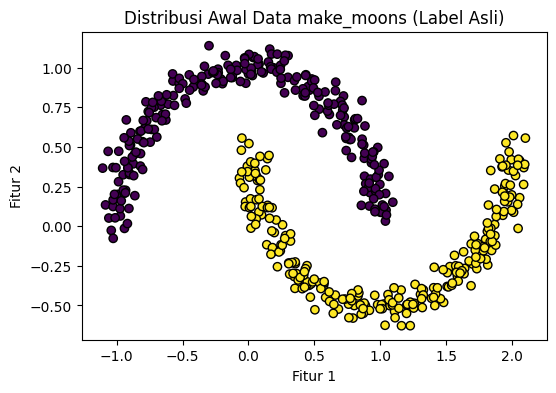

In [43]:
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title("Distribusi Awal Data make_moons (Label Asli)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

In [44]:
import pandas as pd
df = pd.DataFrame(X, columns=["Fitur1", "Fitur2"])
df['Label'] = y

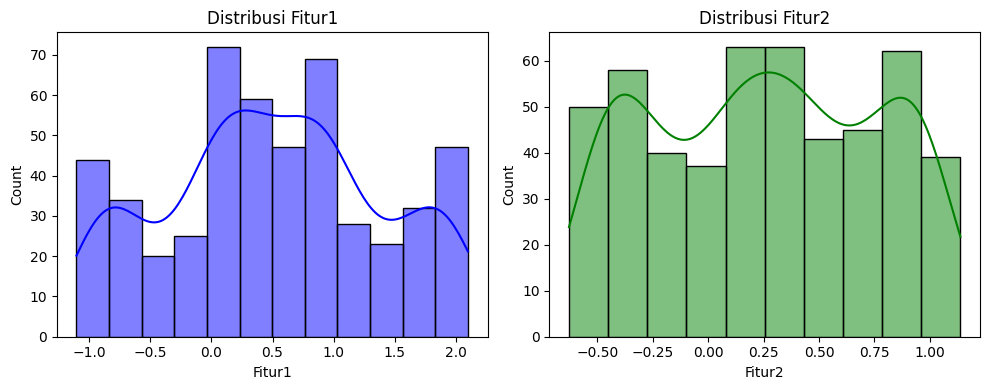

In [45]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(df['Fitur1'], ax=axes[0], kde=True, color='blue')
axes[0].set_title("Distribusi Fitur1")

sns.histplot(df['Fitur2'], ax=axes[1], kde=True, color='green')
axes[1].set_title("Distribusi Fitur2")

plt.tight_layout()
plt.show()

In [46]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels_km = kmeans.labels_

In [47]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)
labels_db = dbscan.labels_

In [48]:
def safe_silhouette_score(X, labels):
    # Fungsi bantu untuk mencegah error jika semua data terklasifikasi ke -1 oleh DBSCAN
    # atau hanya terdapat 1 cluster
    if len(set(labels)) <= 1:
        return None
    return silhouette_score(X, labels)

score_km = safe_silhouette_score(X, labels_km)
score_db = safe_silhouette_score(X, labels_db)

print("Jumlah cluster dari KMeans :", len(np.unique(labels_km)))
print("Silhouette Score KMeans   :", score_km)

Jumlah cluster dari KMeans : 2
Silhouette Score KMeans   : 0.48734667501072454


In [49]:
unique_labels_db = np.unique(labels_db)
n_clusters_db = len(unique_labels_db[unique_labels_db != -1])
print("Jumlah cluster dari DBSCAN:", n_clusters_db)
print("Silhouette Score DBSCAN   :", score_db)

Jumlah cluster dari DBSCAN: 2
Silhouette Score DBSCAN   : 0.3330764920587919


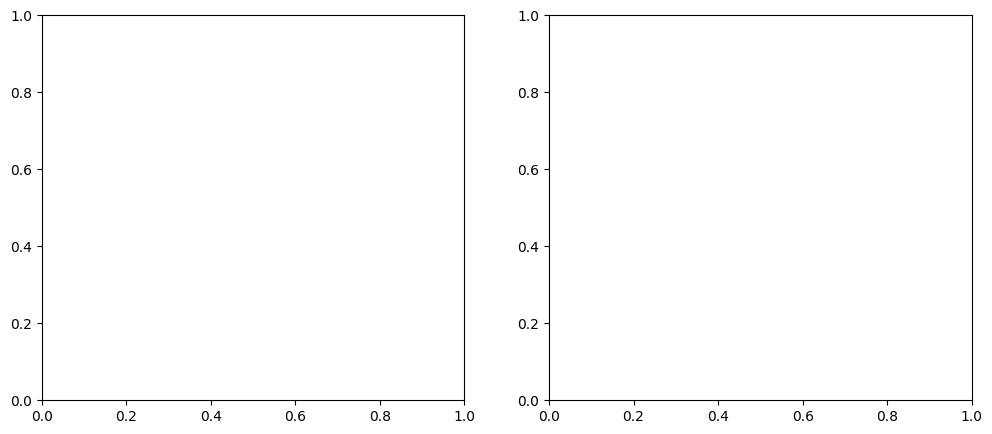

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

In [51]:
axes[0].scatter(X[:, 0], X[:, 1], c=labels_km, cmap='viridis', edgecolors='k')
axes[0].set_title("Hasil Clustering KMeans")

Text(0.5, 1.0, 'Hasil Clustering KMeans')

In [54]:
unique_labels_db = np.unique(labels_db)
colors_db = sns.color_palette("hls", len(unique_labels_db))  # Membuat palet warna

for idx, label in enumerate(unique_labels_db):
    # Jika label == -1, itu adalah noise. Tandai dengan warna/marker yang berbeda
    if label == -1:
        c = 'k'     # hitam
        marker = 'x'
        label_legend = "Noise"
    else:
        c = colors_db[idx]
        marker = 'o'
        label_legend = f"Cluster {label}"

    # Plot hanya data dengan label tertentu
    axes[1].scatter(X[labels_db == label, 0],
                    X[labels_db == label, 1],
                    c=[c],
                    marker=marker,
                    edgecolors='k',
                    label=label_legend)

axes[1].set_title("Hasil Clustering DBSCAN")
axes[1].legend(loc="best")
plt.show()

# The another One

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_moons
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [57]:
sns.set_style("darkgrid")

In [58]:
X, y = make_moons(n_samples=600, noise=0.07, random_state=42)

In [59]:
df = pd.DataFrame(X, columns=['Fitur1', 'Fitur2'])
df['Label_Asli'] = y

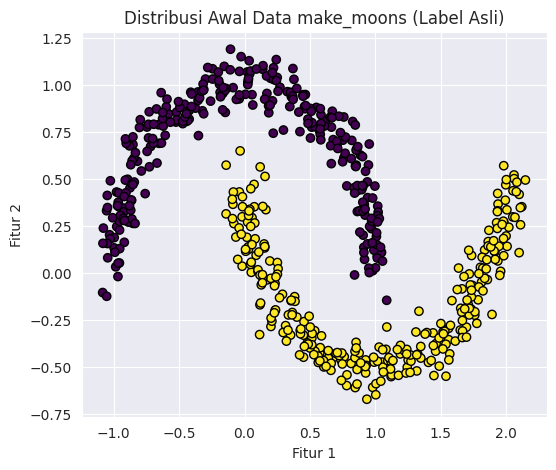

In [60]:
plt.figure(figsize=(6, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Distribusi Awal Data make_moons (Label Asli)")
plt.xlabel("Fitur 1")
plt.ylabel("Fitur 2")
plt.show()

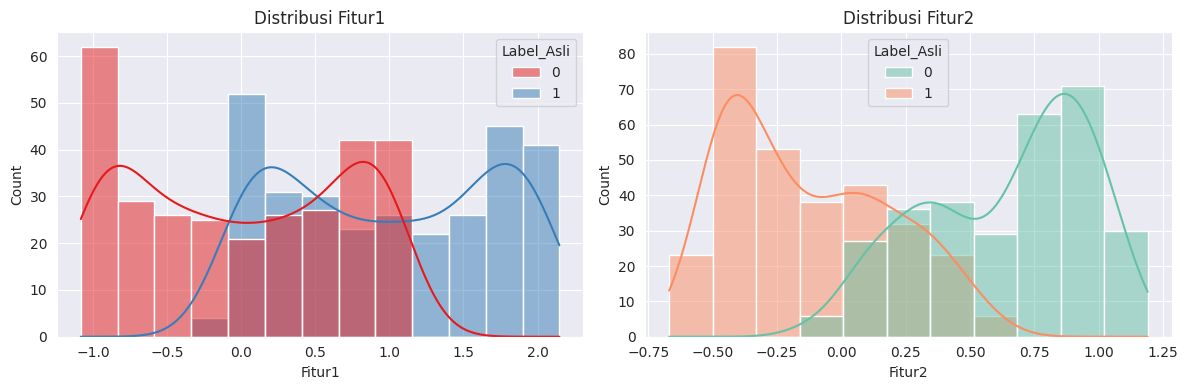

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(data=df, x='Fitur1', hue='Label_Asli', kde=True, ax=axes[0], palette='Set1')
axes[0].set_title("Distribusi Fitur1")

sns.histplot(data=df, x='Fitur2', hue='Label_Asli', kde=True, ax=axes[1], palette='Set2')
axes[1].set_title("Distribusi Fitur2")

plt.tight_layout()
plt.show()

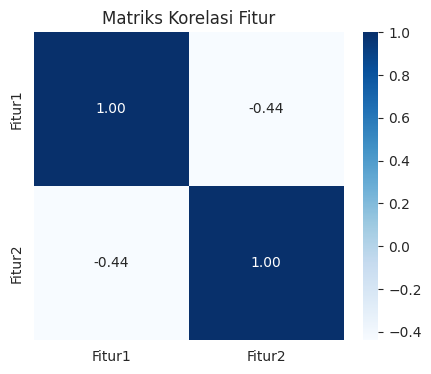

In [62]:
corr_matrix = df[['Fitur1', 'Fitur2']].corr()
plt.figure(figsize=(5, 4))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f")
plt.title("Matriks Korelasi Fitur")
plt.show()

In [63]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
labels_km = kmeans.labels_

In [64]:
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)
labels_db = dbscan.labels_

In [65]:
def safe_silhouette_score(data, labels):
    """Menghitung silhouette score secara aman (hindari error jika hanya 1 cluster)"""
    if len(set(labels)) <= 1:  # Hanya ada 0 atau 1 cluster (semua noise)
        return None
    return silhouette_score(data, labels)

score_km = safe_silhouette_score(X, labels_km)
score_db = safe_silhouette_score(X, labels_db)

# Informasi jumlah cluster (kecuali label noise)
unique_labels_db = np.unique(labels_db)
n_clusters_db = len(unique_labels_db[unique_labels_db != -1])

print("=== EVALUASI CLUSTER ===")
print(f"KMeans -> Jumlah cluster     : {len(np.unique(labels_km))}")
print(f"KMeans -> Silhouette Score   : {score_km}")

print(f"DBSCAN -> Jumlah cluster (≠ -1): {n_clusters_db}")
print(f"DBSCAN -> Silhouette Score     : {score_db}\n")

=== EVALUASI CLUSTER ===
KMeans -> Jumlah cluster     : 2
KMeans -> Silhouette Score   : 0.4894775135094242
DBSCAN -> Jumlah cluster (≠ -1): 1
DBSCAN -> Silhouette Score     : None



Text(0, 0.5, 'Fitur 2')

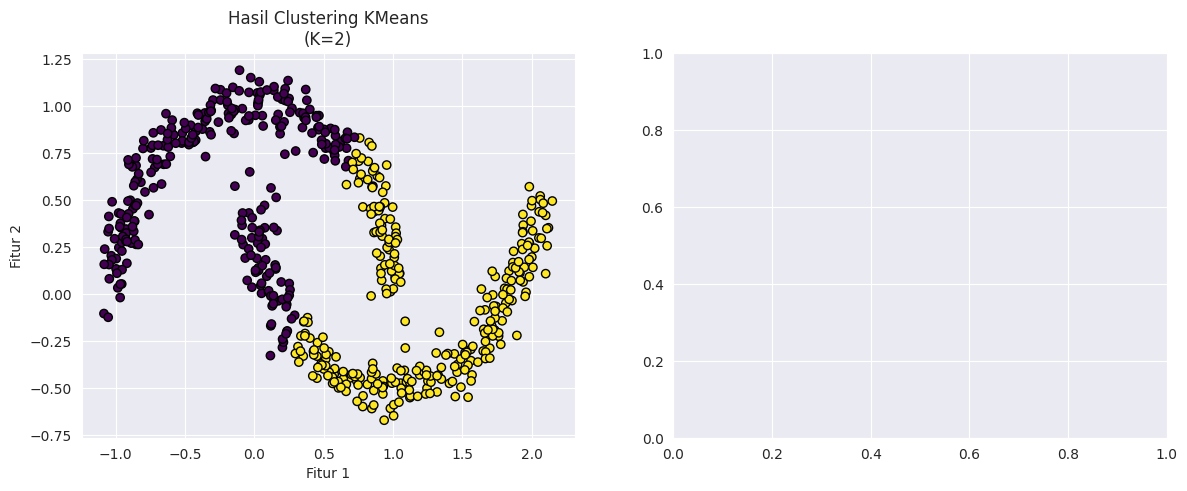

In [69]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 6.1 Hasil Clustering KMeans
axes[0].scatter(X[:, 0], X[:, 1], c=labels_km, cmap='viridis', edgecolor='k')
axes[0].set_title("Hasil Clustering KMeans\n(K=2)")
axes[0].set_xlabel("Fitur 1")
axes[0].set_ylabel("Fitur 2")

In [67]:
unique_dbscan_labels = set(labels_db)
colors_dbscan = sns.color_palette("tab10", len(unique_dbscan_labels))
color_map_dbscan = {label: col for label, col in zip(unique_dbscan_labels, colors_dbscan)}

for label in unique_dbscan_labels:
    # Pisahkan data berdasarkan label
    idx = (labels_db == label)
    if label == -1:
        # Noise
        axes[1].scatter(X[idx, 0], X[idx, 1], c=[color_map_dbscan[label]],
                        label="Noise (-1)", edgecolor='k', marker='x')
    else:
        axes[1].scatter(X[idx, 0], X[idx, 1], c=[color_map_dbscan[label]],
                        label=f"Cluster {label}", edgecolor='k')

axes[1].set_title("Hasil Clustering DBSCAN\n(eps=0.3, min_samples=5)")
axes[1].set_xlabel("Fitur 1")
axes[1].set_ylabel("Fitur 2")
axes[1].legend(loc='best')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>